# Note 1: basics for a neural network
WT Wang                     
May, 02, 2017

------

## 1. Activation function
- An "activation function" is a function applied at each node.

### rectified linear unit  (reLU)
$$f(x) = \max(0, x)$, $x \in (-\infty, \infty)$$
- $x$ is the input to a neuron

### softplus function (a smoothed version of reLU)
$$f(x) = \log(1+e^x)$$

In [25]:
def reLU(input):
    
    # Calculate the value for the output of the reLU function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)


def softplus(input):
    from math import exp, log
    # Calculate the value for the output of the softplus function: output
    output = log(1+ exp(input))
    
    # Return the value just calculated
    return(output)

### Visualization of reLU and softplus

- Goal: To see the difference b/w these two functions.

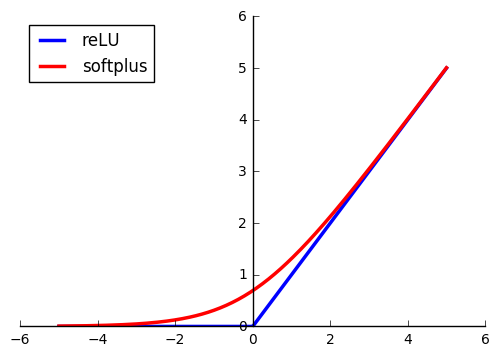

In [26]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 256, endpoint=True)

a1 = []
a2 = []
for i in range(0,256):
    a1.append(reLU(x[i]))
    a2.append(softplus(x[i]))

plt.plot(x, a1, color="blue", linewidth=2.5, linestyle="-", label="reLU")
plt.plot(x, a2, color="red",  linewidth=2.5, linestyle="-", label="softplus")

plt.legend(loc='upper left')
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.show()

## 2. Forward propagation in one layer

Let each of the $M$ hidden layer nodes, $a_j$, be a linear combination of the input variables:
$$
    a_j = \sum_{i = 1}^{p_1} \omega_{1ij}x_{i} + \theta_{1i},
$$
where $x_1, \dots, x_{p_1}$ are $p_1$ input variables, $\omega_{11j}, \dots, \omega_{1{p_1}j}$ are $p_1$ unknown parameters, and $\theta_{1j}$ is an unknown bias node. The prediction with one hidden layer is
$$
   \hat{y}_k = \tilde{f}\left(\sum_{j = 1}^M \gamma_{jk}\cdot f(a_j) + \beta_{j}\right),
$$
where $\gamma_{1k}, \dots, \gamma_{Mk}$ are $M$ unknown parameters, $\beta_{j}$ is an unknown bias node, $f(\cdot)$ and $\tilde{f}(\cdot)$ are the activation functions for the hidden nodes and the response respectively, and $k = 1, \dots, n$.


### Practice
For the next example, we apply the reLU and an identity function as $f(\cdot)$ and $\tilde{f}(\cdot)$, respectively. The weights are given.

#### Define a prediction function
Here, we follow the above equation w/o bias parameters.

In [27]:
# Define predict_with_network()
def predict_with_one_layer(input_data_row, weights):

    # Calculate node 0 value
    node_0_input =  (input_data_row * weights['node_0']).sum()
    node_0_output = reLU(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = reLU(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = reLU(input_to_final_layer)
    
    # Return model output
    return(model_output)

#### Toy example
Set the weights as ${\bf{\omega}}_1 = \left[ \begin{array}{cc}
-5 & 5 \\
-1 & 1\\
\end{array} \right]$, ${\bf{\gamma}} = \left[ \begin{array}{c}
3  \\
7\\
\end{array} \right]$, and the input data as ${\bf{x}} = \left[ \begin{array}{c}
7 \\
5\\
\end{array} \right]$. Use `predict_with_one_layer()` to calculate the prediciton as follows. 

In [28]:
# Example
import numpy as np

weights = {
 'node_0': np.array([ 5, -5]),
 'node_1': np.array([-1,  1]),
 'output': np.array([3, 7])}
input_data = np.array([7, 5])
output = predict_with_one_layer(input_data, weights)
print(output)

30


## 3. Forward propagation in two layers
Similar to the prediction with one hidden layer, the prediction with two hidden layers is
$$
   \hat{y}_k = \tilde{f}\left(\sum_{j = 1}^M \gamma_{jk}\cdot f\left(\sum_{\ell = 1}^{p_2} \omega_{2\ell j} \cdot f(a_{\ell j}) + \theta_{2\ell}\right) + \beta_{j}\right),
$$
where $\omega_{21j}, \dots, \omega_{2{p_2}j}$ are $p_2$ unknown parameters, $\theta_{2\ell}$ is an unknown bias node.


### Practice
For the next example, we apply the reLU and an identity function as $f(\cdot)$ and $\tilde{f}(\cdot)$, respectively. The weights are given.

#### Define a prediction function with two layers
Here, we follow the above equation w/o bias parameters, and set $p_1 =p_2$.

In [29]:
def predict_with_two_layers(input_data, weights):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = reLU(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = reLU(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = reLU(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = reLU(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

#### Toy example
Set the weights as ${\bf{\omega}}_1 = \left[ \begin{array}{cc}
-5 & 5 \\
-1 & 3\\
\end{array} \right]$, ${\bf{\omega}}_2 = \left[ \begin{array}{cc}
-3 & 4 \\
2 & 2\\
\end{array} \right]$, ${\bf{\gamma}} = \left[ \begin{array}{c}
2 \\
7\\
\end{array} \right]$, and the input data as ${\bf{x}} = \left[ \begin{array}{c}
7 \\
5\\
\end{array} \right]$. Use `predict_with_two_layer()` to calculate the prediciton as follows. 

In [30]:
# Example
import numpy as np

weights = {'node_0_0': np.array([-5, 5]),
 'node_0_1': np.array([ -1, 3]),
 'node_1_0': np.array([-3,  4]),
 'node_1_1': np.array([2, 2]),
 'output': np.array([2, 7])}
input_data = np.array([7, 5])
output = predict_with_two_layers(input_data, weights)
print(output)

176
